# Software Education Data Visualization for Distraction

In [0]:
from google.colab import drive
drive.mount('/content/drive/') #change to your file path for the data...or do Github option?

## Importing raw data

In [0]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys


In [0]:
# Define these parameters 
duration = 120 # in seconds. 120 is recommended
subject = 1 # unique id for each participant
session = 1 # represents a data collection session. Multiple trials can be performed for each session



In [0]:
import mne
import pandas as pd
def readmusedata(filename):
    #takes muse csv file, returns mne object
    data = pd.read_csv(filename,engine = "python")
    data = data.drop("AUX",axis = 1)
    data = data.dropna(axis = 0)
    ch_names = list(data.columns[1:])
    ch_types = ["eeg"] * 4
    sfreq = 256 #sampling frequency
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
    newdata = data.loc[:,data.columns[1:]].values.T
    rawdata = mne.io.RawArray(newdata,info)
    return rawdata

In [0]:
no_distractor_file_name = "CMR_0301_1705"
distractor_file_name = "CMR_0301_1735"
no_distractor = readmusedata(no_distractor_file_name + '.csv')
distractor = readmusedata(distractor_file_name + '.csv')


Creating RawArray with float64 data, n_channels=4, n_times=251016
    Range : 0 ... 251015 =      0.000 ...   980.527 secs
Ready.
Creating RawArray with float64 data, n_channels=4, n_times=354684
    Range : 0 ... 354683 =      0.000 ...  1385.480 secs
Ready.


## Plotting Raw Data

Effective window size : 8.000 (s)


<ipython-input-23-e9288e51e2cb>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  no_distractor.plot_psd();


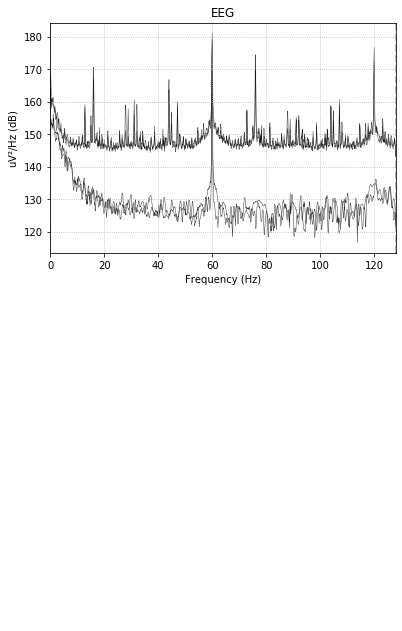

In [0]:
no_distractor.plot_psd();

Effective window size : 8.000 (s)


<ipython-input-24-33208d71b97d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  distractor.plot_psd();


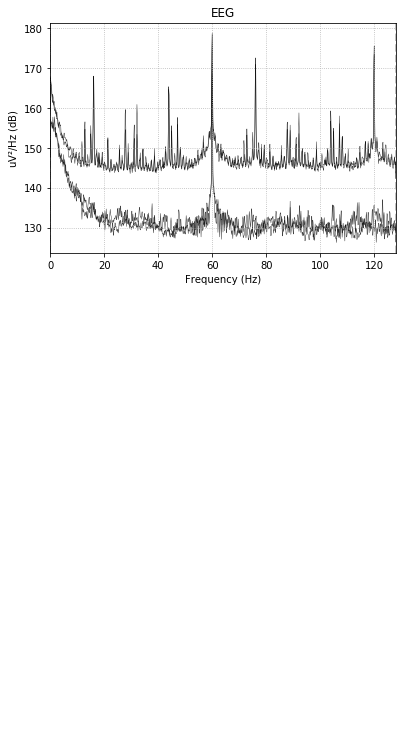

In [0]:
distractor.plot_psd();

## Filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


<ipython-input-26-50da8c5e8a27>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  no_distractor_fig = no_distractor.plot_psd(fmin=1, fmax=30, show=False).gca()


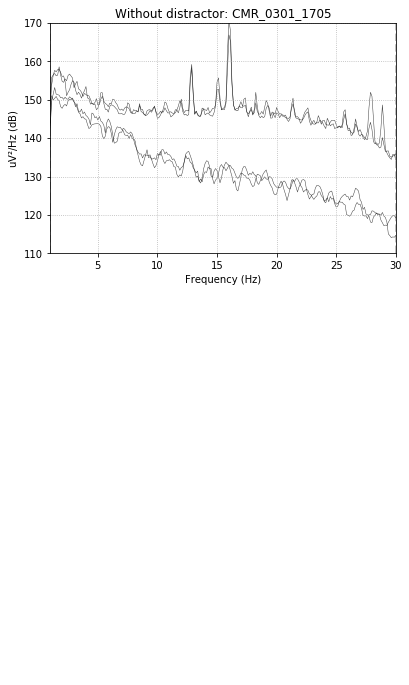

In [0]:
no_distractor.filter(1,30, method='iir')
no_distractor_fig = no_distractor.plot_psd(fmin=1, fmax=30, show=False).gca()
no_distractor_fig.set_title('Without distractor: ' + no_distractor_file_name)
no_distractor_fig.set_ylim([110, 170]);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


<ipython-input-27-b5e78849d5df>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  distractor_fig = distractor.plot_psd(fmin=1, fmax=30, show=False).gca()


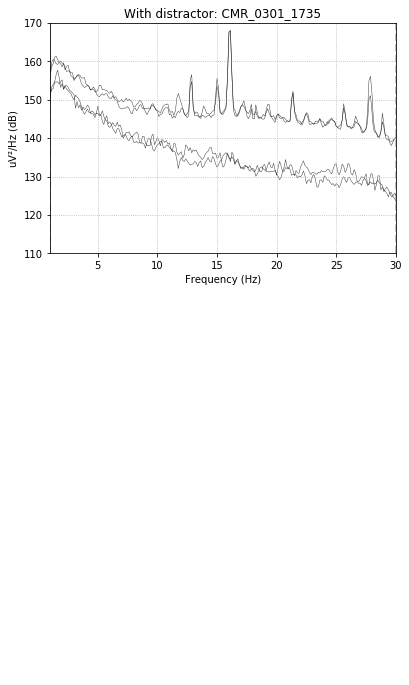

In [0]:
distractor.filter(1,30, method='iir')
distractor_fig = distractor.plot_psd(fmin=1, fmax=30, show=False).gca()
distractor_fig.set_title('With distractor: ' + distractor_file_name)
distractor_fig.set_ylim([110, 170]);